<a href="https://colab.research.google.com/github/HimanshuAnuragi/HimanshuAnuragi/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
[0,0] -> [0]
[0,1] -> [1]

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[1],[1],[1],[0]], "float32")
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',
optimizer='adam',
metrics=['binary_accuracy'])
model.fit(training_data, target_data, epochs=100)
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense

In [ ]:
model = Sequential() # Intialise input...
model.add(Dense(5, input_dim=2, activation='relu')) # Hidden layer...
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Output neuron...

In [ ]:
model.summary()

In [ ]:
model.compile(loss='mean_squared_error',
optimizer='adam',
metrics=['binary_accuracy'])

In [ ]:
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
target_data = np.array([[0],[1],[1],[0]], "float32")

In [ ]:
model.fit(training_data, target_data, epochs=100)
scores = model.evaluate(training_data, target_data)

In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


binary_accuracy: 75.00%
[[0.]
 [0.]
 [1.]
 [0.]]


In [ ]:
target_data

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
training_data = np.array([[1.5,1.6],[1,0],[1,0],[1,1]], "float32")
target_data = np.array([[1],[0],[1],[0]], "float32")

In [ ]:
print (model.predict(training_data).round())

[[0.]
 [1.]
 [1.]
 [0.]]


11501568/11490434 [==============================] - 0s 0us/step


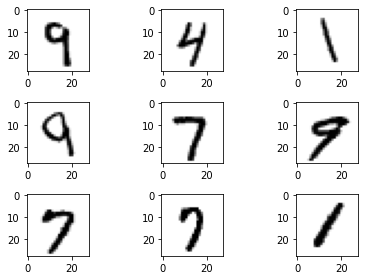

In [ ]:
# importing libraries
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

#loading dataset
(train_X, train_y), (val_X, val_y) = mnist.load_data()

#normalizing the dataset
train_X, val_X = train_X/255, val_X/255

# visualizing 9 rndom digits from the dataset
for i in range(331,340):
    plt.subplot(i)
    a = np.random.randint(0, train_X.shape[0], 1)
    plt.imshow(train_X[a[0]], cmap = plt.get_cmap('binary'))

plt.tight_layout()
plt.show()

In [ ]:
# importing the libraries
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

#defining function for building the model
def create_model(input_shape = (28,28,1)):
    model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Flatten(),
    layers.Dense(units = 54, activation = 'relu'),
    layers.Dense(units = 10, activation = 'softmax')])
    
    return model

In [ ]:
def compile_model(model, optimizer='adam', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

In [ ]:
def fitting_model(model, x, y, epoch):
    model.fit(x,y, shuffle = True, epochs = epoch)

In [ ]:
#reshaping the independant variables
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
val_X = val_X .reshape(val_X.shape[0], 28, 28, 1)

#encoding the dependant variable
train_y = np.eye(10)[train_y]
val_y = np.eye(10)[val_y]

#creating model
model = create_model((28,28,1))
#optimizing model
compile_model(model, 'adam', 'categorical_crossentropy')

#training model
history = model.fit(train_X, train_y, validation_data = (val_X, val_y), batch_size = 200, epochs = 5)
model.save("cnn_digitclass.model") #model will be save in root folder to be later called out for prediction


IndexError: ignored

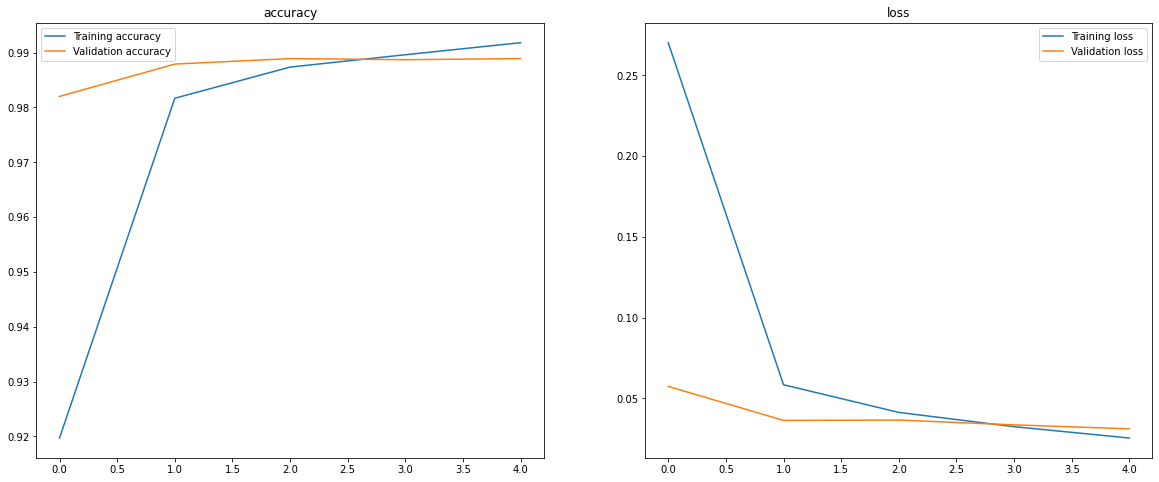

In [ ]:
#model performance visualization
f = plt.figure(figsize=(20,8))

#accuracy
plt1 = f.add_subplot(121)
plt1.plot(history.history['accuracy'], label = str('Training accuracy'))
plt1.plot(history.history['val_accuracy'], label = str('Validation accuracy'))
plt.legend()
plt.title('accuracy')

#loss
plt2 = f.add_subplot(122)
plt2.plot(history.history['loss'], label = str('Training loss'))
plt2.plot(history.history['val_loss'], label = str('Validation loss'))
plt.legend()
plt.title('loss')

plt.show()

In [ ]:
#importing and processing input image
import cv2
img = cv2.imread("sample_img.jpg") #loading input image
img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA) #resizing to input shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #chaging to grayscale format
img = cv2.bitwise_not(img) #the color scale was inverted, correcting inverted color scale
img = cv2.Canny(img, 50, 50) # removing noise

predict_data = np.array([img])/255 #changing image data to array
predict_data = predict_data.reshape(1,28, 28, 1) #reshaping to input shape

#predicting the input 
from tensorflow.keras import models
model = models.load_model('cnn_digitclass.model') #loading pre-savedd model
prediction = model.predict(predict_data) #gives array
predicted_number = np.argmax(prediction) #extracts predicted number